In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t_d = pd.read_csv('IMDB Dataset.csv')
t_d.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [3]:
t_d.isna().sum()

review       0
sentiment    0
dtype: int64

In [4]:
st = set(stopwords.words('english'))
p_ck = list(punctuation)
st.update(p_ck)

In [5]:
def 웹문서_처리(t):
    su = BeautifulSoup(t,'html.parser')
    return su.get_text()
def 정규표현_정리(t):
    return re.sub('\[[^]*\]','',t)
def 불필요_정리(t):
    return re.sub('http\S+','',t)
def 불용어_처리(t):
    f_l = []
    for i in t.split():
        if i.strip().lower() not in st and i.strip().lower().isalpha():
            f_l.append(i.strip().lower())
    return ' '.join(f_l)
def 모두_정리(t):
    t = 웹문서_처리(t)
    t = 불필요_정리(t)
    t = 불용어_처리(t)
    return t
t_d['review'] = t_d['review'].apply(모두_정리)

In [44]:
t_d.head(2)

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,1
1,wonderful little filming technique fashion giv...,1


In [6]:
t_d.sentiment.replace('positive',1,inplace=True)
t_d.sentiment.replace('negative',0,inplace=True)

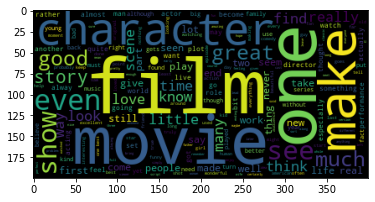

In [7]:
wc = WordCloud(max_words=2000).generate(' '.join(t_d[t_d.sentiment==1].review))
plt.imshow(wc)

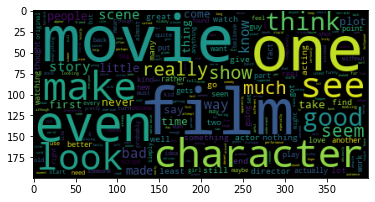

In [8]:
wc = WordCloud(max_words=2000).generate(' '.join(t_d[t_d.sentiment==0].review))
plt.imshow(wc)

길이는 조건이 x

In [9]:
t_l_0 = t_d[t_d.sentiment==0]['review'].str.len()
t_l_1 = t_d[t_d.sentiment==1]['review'].str.len()

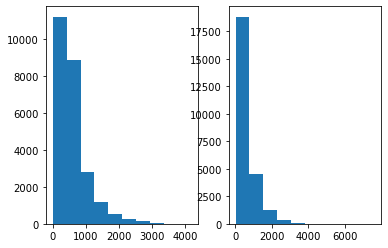

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(t_l_0)
ax2.hist(t_l_1)
plt.show()

문장별 단어의 수는 조건 x

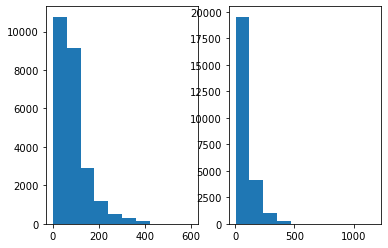

In [11]:
t_l_0 = t_d[t_d.sentiment==0]['review'].str.split().map(lambda x: len(x))
t_l_1 = t_d[t_d.sentiment==1]['review'].str.split().map(lambda x: len(x))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(t_l_0)
ax2.hist(t_l_1)
plt.show()

평균 단어 길이 조건 x

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

<AxesSubplot:xlabel='review', ylabel='Density'>

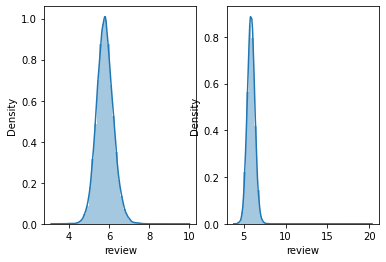

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2)
t_l_0=t_d[t_d.sentiment==0]['review'].str.split().apply(lambda x: 
                                                        [len(i) for i in x])
sns.distplot(t_l_0.map(lambda x : np.mean(x)),ax=ax1)
t_l_1=t_d[t_d.sentiment==1]['review'].str.split().apply(lambda x: 
                                                        [len(i) for i in x])
sns.distplot(t_l_1.map(lambda x : np.mean(x)),ax=ax2)

In [13]:
def N_그램_표현(t,n,g):
    tv = CountVectorizer(ngram_range=(g,g)).fit(t)
    Bow = tv.transform(t)
    sum_Bow = Bow.sum(axis = 0)
    w_f = [(w,sum_Bow[0,i]) for w,i in tv.vocabulary_.items()]
    w_f = sorted(w_f, key = lambda x : x[1], reverse= True)
    return w_f[:n]
N_그램_표현(t_d.review,20,1)

[('movie', 61496),
 ('film', 55088),
 ('one', 45067),
 ('like', 37303),
 ('would', 23815),
 ('even', 23720),
 ('good', 23475),
 ('really', 21806),
 ('see', 20906),
 ('get', 17692),
 ('much', 17294),
 ('story', 16812),
 ('also', 15775),
 ('time', 15660),
 ('first', 15475),
 ('great', 15475),
 ('people', 15036),
 ('make', 15030),
 ('could', 14929),
 ('made', 13562)]

In [16]:
! pip install plotly

In [17]:
import plotly.express as px

In [18]:
ck1_data = dict(N_그램_표현(t_d.review,20,1))
ck1_data

{'movie': 61496,
 'film': 55088,
 'one': 45067,
 'like': 37303,
 'would': 23815,
 'even': 23720,
 'good': 23475,
 'really': 21806,
 'see': 20906,
 'get': 17692,
 'much': 17294,
 'story': 16812,
 'also': 15775,
 'time': 15660,
 'first': 15475,
 'great': 15475,
 'people': 15036,
 'make': 15030,
 'could': 14929,
 'made': 13562}

In [21]:
ck1_data = dict(N_그램_표현(t_d.review,20,1))
v_df = pd.DataFrame(columns=['c_w','n'])
v_df['c_w'] = list(ck1_data.keys())
v_df['n'] = list(ck1_data.values())
v_df

,c_w,n
0,movie,61496
1,film,55088
2,one,45067
3,like,37303
4,would,23815
5,even,23720
6,good,23475
7,really,21806
8,see,20906
9,get,17692


In [30]:
fig = px.bar(v_df,x='n' ,y='c_w',orientation='h',title = 'c_w_n',color='c_w')
fig.show()

In [32]:
ck2_data = dict(N_그램_표현(t_d.review,20,2))
v_df1 = pd.DataFrame(columns=['c_w','n'])
v_df1['c_w'] = list(ck2_data.keys())
v_df1['n'] = list(ck2_data.values())
fig = px.bar(v_df1,x='n' ,y='c_w',orientation='h',title = 'c_w_n',color='c_w')
fig.show()

In [33]:
ck3_data = dict(N_그램_표현(t_d.review,20,3))
v_df2 = pd.DataFrame(columns=['c_w','n'])
v_df2['c_w'] = list(ck3_data.keys())
v_df2['n'] = list(ck3_data.values())
fig = px.bar(v_df2,x='n' ,y='c_w',orientation='h',title = 'c_w_n',color='c_w')
fig.show()

In [34]:
t_d[t_d.sentiment==0]['review']

3        basically family little boy thinks zombie clos...
7        show fresh innovative idea first first years t...
8        encouraged positive comments film looking forw...
10       phil alien one quirky films humour based aroun...
11       saw movie came recall scariest scene big bird ...
                               ...                        
49994    typical junk almost genuine memorable scenes t...
49996    bad bad bad idiotic annoying porn groove sound...
49997    catholic taught parochial elementary schools t...
49998    going disagree previous comment side maltin se...
49999    one expects star trek movies high fans expect ...
Name: review, Length: 25000, dtype: object

In [35]:
type(t_d[t_d.sentiment==0]['review'])

pandas.core.series.Series

In [40]:
t_l_0_s = t_d[t_d.sentiment==0]['review']
t_l_1_s = t_d[t_d.sentiment==1]['review']

In [37]:
t_l_0_data = dict(N_그램_표현(t_l_0_s,20,1))
v_df_t_l_0_1 = pd.DataFrame(columns=['c_w','n'])
v_df_t_l_0_1['c_w'] = list(t_l_0_data.keys())
v_df_t_l_0_1['n'] = list(t_l_0_data.values())
fig = px.bar(v_df_t_l_0_1,x='n' ,y='c_w',orientation='h',title = 'c_w_n',color='c_w')
fig.show()

In [38]:
t_l_0_data2 = dict(N_그램_표현(t_l_0_s,20,2))
v_df_t_l_0_2 = pd.DataFrame(columns=['c_w','n'])
v_df_t_l_0_2['c_w'] = list(t_l_0_data2.keys())
v_df_t_l_0_2['n'] = list(t_l_0_data2.values())
fig = px.bar(v_df_t_l_0_2,x='n' ,y='c_w',orientation='h',title = 'c_w_n',color='c_w')
fig.show()

In [39]:
t_l_0_data3 = dict(N_그램_표현(t_l_0_s,20,3))
v_df_t_l_0_3 = pd.DataFrame(columns=['c_w','n'])
v_df_t_l_0_3['c_w'] = list(t_l_0_data3.keys())
v_df_t_l_0_3['n'] = list(t_l_0_data3.values())
fig = px.bar(v_df_t_l_0_3,x='n' ,y='c_w',orientation='h',title = 'c_w_n',color='c_w')
fig.show()

In [41]:
t_l_1_data = dict(N_그램_표현(t_l_1_s,20,1))
v_df_t_l_1_1 = pd.DataFrame(columns=['c_w','n'])
v_df_t_l_1_1['c_w'] = list(t_l_1_data.keys())
v_df_t_l_1_1['n'] = list(t_l_1_data.values())
fig = px.bar(v_df_t_l_1_1,x='n' ,y='c_w',orientation='h',title = 'c_w_n',color='c_w')
fig.show()

In [42]:
t_l_1_data2 = dict(N_그램_표현(t_l_1_s,20,2))
v_df_t_l_1_2 = pd.DataFrame(columns=['c_w','n'])
v_df_t_l_1_2['c_w'] = list(t_l_1_data2.keys())
v_df_t_l_1_2['n'] = list(t_l_1_data2.values())
fig = px.bar(v_df_t_l_1_2,x='n' ,y='c_w',orientation='h',title = 'c_w_n',color='c_w')
fig.show()

In [43]:
t_l_1_data3 = dict(N_그램_표현(t_l_1_s,20,3))
v_df_t_l_1_3 = pd.DataFrame(columns=['c_w','n'])
v_df_t_l_1_3['c_w'] = list(t_l_1_data3.keys())
v_df_t_l_1_3['n'] = list(t_l_1_data3.values())
fig = px.bar(v_df_t_l_1_3,x='n' ,y='c_w',orientation='h',title = 'c_w_n',color='c_w')
fig.show()